### Percentage distribution of answers

##### Internal verification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db = 'SZBA'  # example database name

cd = './LLM_Risk_Stratification/'

llm_models = ['medgemma','gpt','deepseek','baichuan','llama','qwen']
labels = [
    'MedGemma',
    'GPT-4.1',
    'DeepSeek-V3',
    'Baichuan-M1',
    'LLaMA-3.3',
    'Qwen-3',
]

# List to store decision statistics for each model
all_model_counts = []

for model, label in zip(llm_models, labels):
    # print(f'------{model}------')
    search_path = cd + f'llm_results_all_high_risk_Int/{model}/{db}/'  # Modify the results storage path
    llm_results_df = pd.read_csv(search_path + 'llm_false_alarm_analysis.csv')

    # Get value_counts, including all possible labels
    value_counts = llm_results_df['LLM_decision'].value_counts(dropna=False)
    # print(value_counts)

    # Normalize into a unified dict structure to keep the same column order
    row = {
        'Model': label,
        'yes': value_counts.get('yes', 0),
        'uncertain': value_counts.get('uncertain', 0),
        'no': value_counts.get('no', 0),
    }
    all_model_counts.append(row)

# Build DataFrame
decision_df = pd.DataFrame(all_model_counts)

# Display
print(decision_df)

# Assuming decision_df is defined with 'yes', 'uncertain', and 'no' columns
counts = decision_df[['yes','uncertain','no']]  # Note the order
data = counts.div(counts.sum(axis=1), axis=0).multiply(100).round(1).to_numpy()
print(data)


         Model  yes  uncertain  no
0     MedGemma  131          0  32
1      GPT-4.1  154          4   5
2  DeepSeek-V3  141         18   4
3  Baichuan-M1  159          4   0
4    LLaMA-3.3  156          0   7
5       Qwen-3  148          8   7
[[80.4  0.  19.6]
 [94.5  2.5  3.1]
 [86.5 11.   2.5]
 [97.5  2.5  0. ]
 [95.7  0.   4.3]
 [90.8  4.9  4.3]]


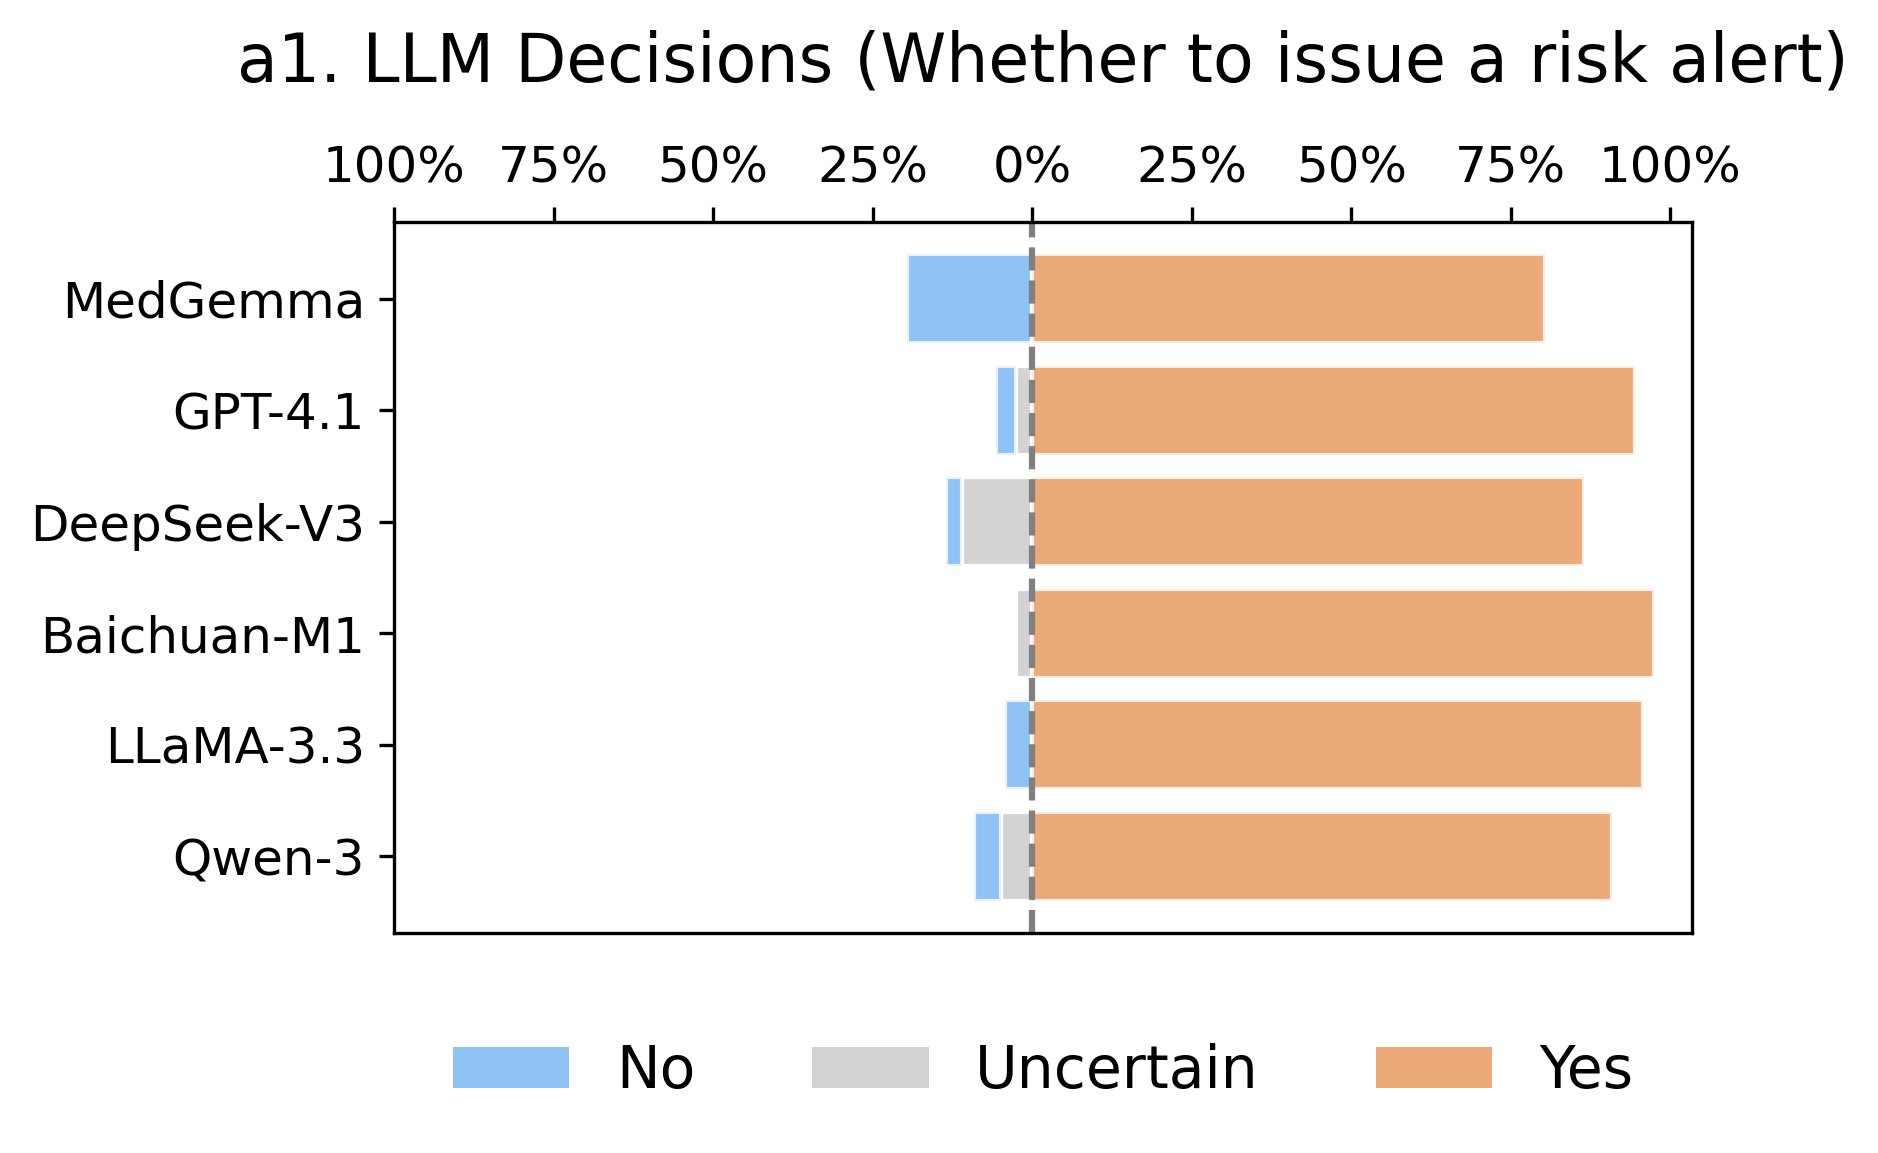

In [ ]:
################## Internal Validation #################################
name = 'H2 (Internal validation)'
num = 'a1'
title = "LLM Decisions (Whether to issue a risk alert)"

# colors = ['#E69555', '#D3D3D3', '#73B3F3']
# categories = ['Yes', 'Uncertain', 'No']
categories = ['Yes', 'Uncertain', 'No']
colors = ['#E69555', '#D3D3D3', '#73B3F3']  # Blue = No, Gray = Uncertain, Orange = Yes

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Adjustment: stack Uncertain + No on the left, display Yes on the right
for i in range(len(labels)):
    uncertain = data[i, 1]  # “Uncertain”
    no = data[i, 2]         # “No”
    yes = data[i, 0]        # “Yes”

    # Left part: Uncertain starting from -uncertain
    ax.barh(
        labels[i], uncertain,
        left=-uncertain, color=colors[1], edgecolor='white',
        label=categories[1] if i == 0 else None
    )
    # No appended to the left of Uncertain
    ax.barh(
        labels[i], no,
        left=-(uncertain + no), color=colors[2], edgecolor='white', alpha=0.8,
        label=categories[2] if i == 0 else None
    )

    # Right part: Yes starting from 0
    ax.barh(
        labels[i], yes,
        left=0, color=colors[0], edgecolor='white', alpha=0.8,
        label=categories[0] if i == 0 else None
    )

# Dashed vertical center line
ax.axvline(0, color='gray', linestyle='--')

# Symmetric x-axis + percentage labels
xticks = [-100, -75, -50, -25, 0, 25, 50, 75, 100]
xtick_labels = ['100%', '75%', '50%', '25%', '0%', '25%', '50%', '75%', '100%']
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)

# Set x-axis tick font size
ax.tick_params(axis='x', labelsize=12)

# Set y-axis label/tick font size
# ax.set_ylabel('Models', fontsize=14)
ax.tick_params(axis='y', labelsize=12)

# Move x-axis ticks to the top
ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
# ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_label_position('bottom')

### Add by Visio later (to facilitate adding sublabels) ###
# ax.set_xlabel(f'{name}', labelpad=10, fontsize=14)

# Legend at the bottom
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, frameon=False, fontsize=14)

# Manually set legend order: ['No', 'Uncertain', 'Yes']
from matplotlib.patches import Patch

custom_legend = [
    Patch(facecolor=colors[2], label='No', alpha=0.8),        # No (blue)
    Patch(facecolor=colors[1], label='Uncertain'),            # Uncertain (gray)
    Patch(facecolor=colors[0], label='Yes', alpha=0.8),       # Yes (orange)
]

ax.legend(
    handles=custom_legend,
    loc='upper center', bbox_to_anchor=(0.5, -0.08),
    ncol=3, frameon=False, fontsize=14
)

# Figure title + reverse y-axis order
ax.set_title(f'{num}. {title}', loc='center', fontsize=16, pad=15)
ax.invert_yaxis()

plt.tight_layout()
plt.show()


##### External verification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db = 'SZBA'  # example database name

cd = './LLM_Risk_Stratification/'

llm_models = ['medgemma','gpt','deepseek','baichuan','llama','qwen']
labels = [
    'MedGemma',
    'GPT-4.1',
    'DeepSeek-V3',
    'Baichuan-M1',
    'LLaMA-3.3',
    'Qwen-3',
]

# Used to store the decision statistics for each model
all_model_counts = []

for model, label in zip(llm_models, labels):
    # print(f'------{model}------')
    search_path = cd + f'llm_results_all_high_risk_Ext/{model}/{db}/'  # Modify results storage path
    llm_results_df = pd.read_csv(search_path + 'llm_false_alarm_analysis.csv')

    # Get value_counts, including all possible labels
    value_counts = llm_results_df['LLM_decision'].value_counts(dropna=False)
    # print(value_counts)

    # Normalize into unified dict structure to ensure consistent column order
    row = {
        'Model': label,
        'yes': value_counts.get('yes', 0),
        'uncertain': value_counts.get('uncertain', 0),
        'no': value_counts.get('no', 0),
    }
    all_model_counts.append(row)

# Construct DataFrame
decision_df = pd.DataFrame(all_model_counts)

# Display
print(decision_df)

# Assuming decision_df is defined and contains columns 'yes', 'uncertain', 'no'
counts = decision_df[['yes','uncertain','no']]  # Note the order
data = counts.div(counts.sum(axis=1), axis=0).multiply(100).round(1).to_numpy()
# data = counts.div(counts.sum(axis=1), axis=0).multiply(100).round(2).to_numpy()
print(data)


         Model  yes  uncertain  no
0     MedGemma   78          0  35
1      GPT-4.1  102          7   4
2  DeepSeek-V3   89         23   1
3  Baichuan-M1  112          1   0
4    LLaMA-3.3  104          0   9
5       Qwen-3   92         11  10
[[69.   0.  31. ]
 [90.3  6.2  3.5]
 [78.8 20.4  0.9]
 [99.1  0.9  0. ]
 [92.   0.   8. ]
 [81.4  9.7  8.8]]


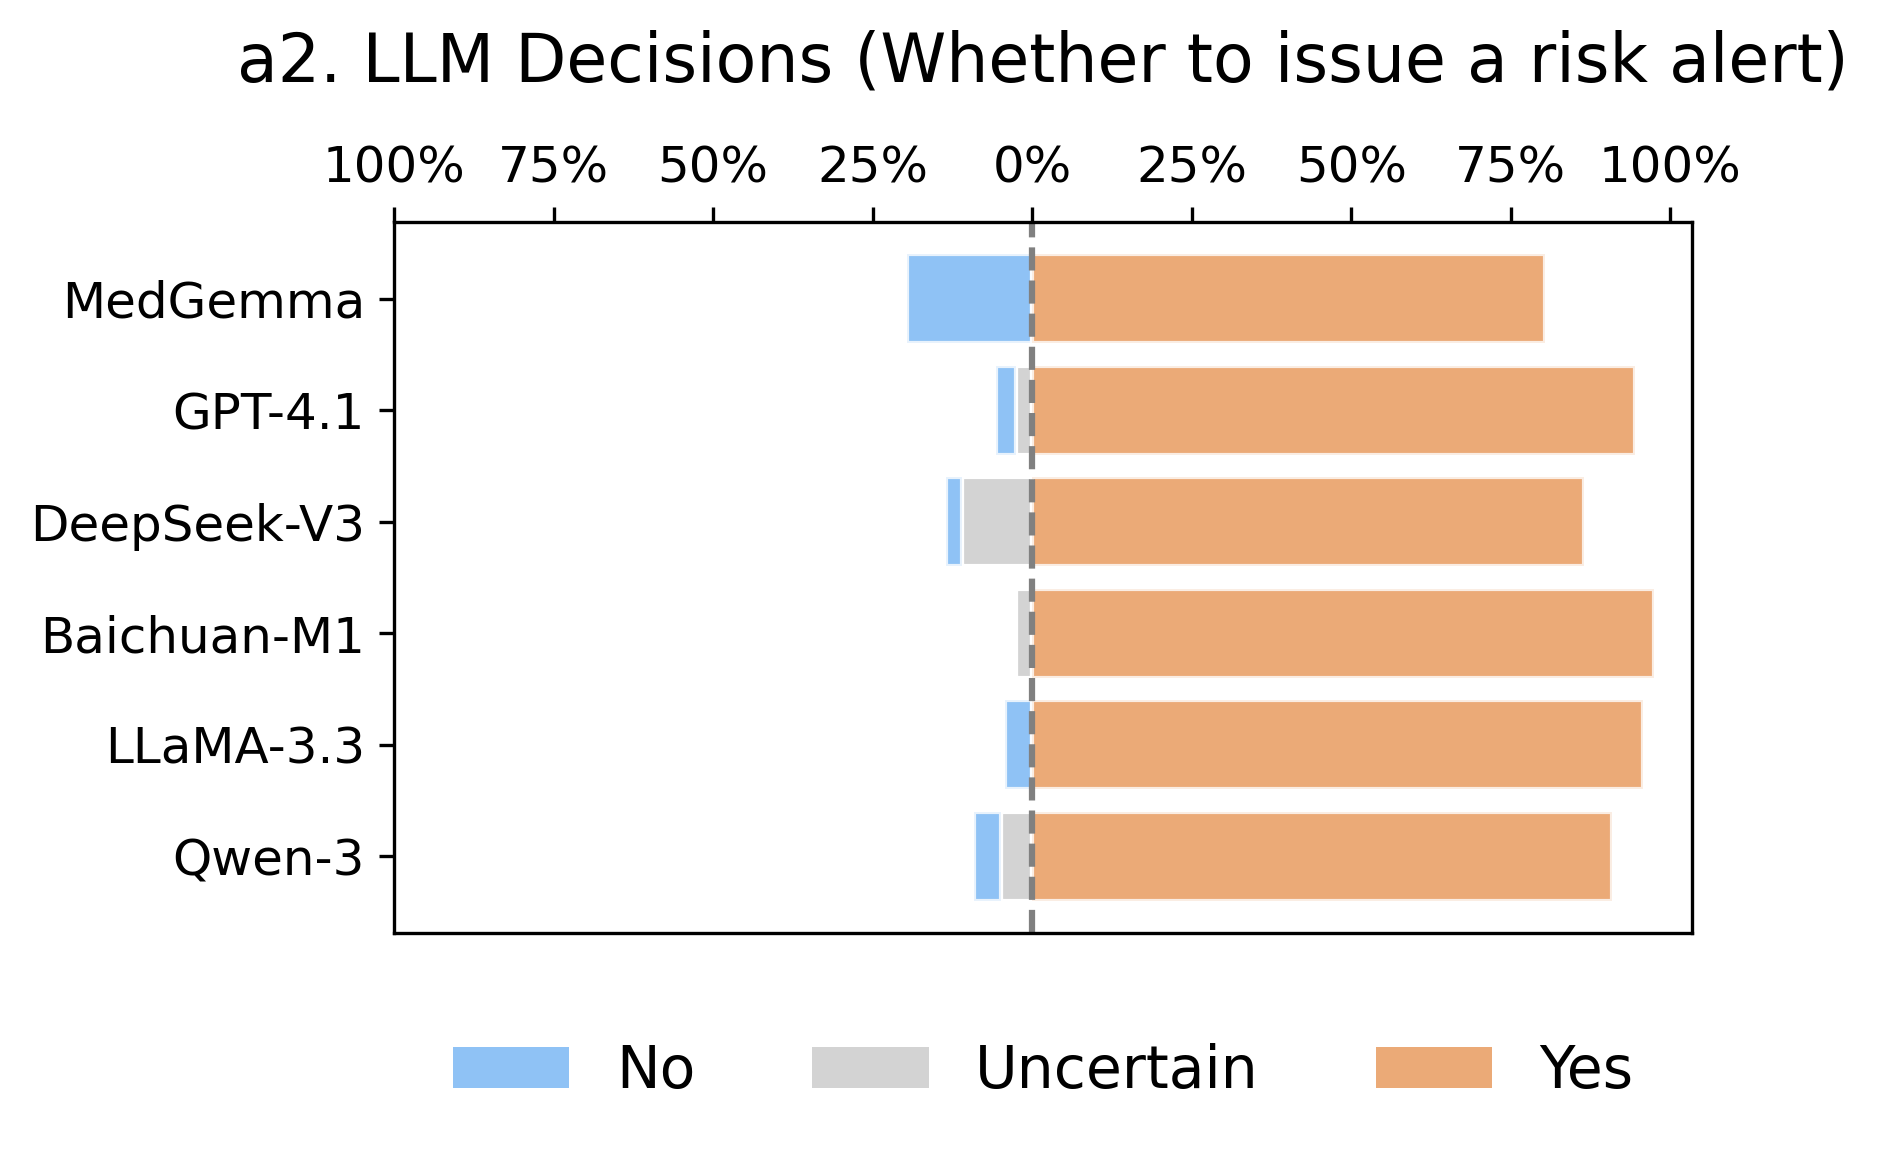

In [ ]:
################## External Validation #################################
name = 'H2 (External validation)'
# num = 'b1'
num = 'a2'
title = "LLM Decisions (Whether to issue a risk alert)"

# colors = ['#E69555', '#D3D3D3', '#73B3F3']
# categories = ['Yes', 'Uncertain', 'No']
categories = ['Yes', 'Uncertain', 'No']
colors = ['#E69555', '#D3D3D3', '#73B3F3']  # Blue = No, Gray = Uncertain, Orange = Yes

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Adjustment: stack Uncertain + No on the left, display Yes on the right
for i in range(len(labels)):
    uncertain = data[i, 1]  # "Uncertain"
    no = data[i, 2]         # "No"
    yes = data[i, 0]        # "Yes"

    # Left section: Uncertain starts from -uncertain
    ax.barh(
        labels[i], uncertain,
        left=-uncertain, color=colors[1], edgecolor='white',
        label=categories[1] if i == 0 else None
    )
    # No is appended to the left of Uncertain
    ax.barh(
        labels[i], no,
        left=-(uncertain + no), color=colors[2], edgecolor='white', alpha=0.8,
        label=categories[2] if i == 0 else None
    )

    # Right section: Yes starts from 0
    ax.barh(
        labels[i], yes,
        left=0, color=colors[0], edgecolor='white', alpha=0.8,
        label=categories[0] if i == 0 else None
    )

# Dashed vertical center line
ax.axvline(0, color='gray', linestyle='--')

# Set symmetric x-axis + percentage labels
xticks = [-100, -75, -50, -25, 0, 25, 50, 75, 100]
xtick_labels = ['100%', '75%', '50%', '25%', '0%', '25%', '50%', '75%', '100%']
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)

# Set x-axis tick font size
ax.tick_params(axis='x', labelsize=12)

# Set y-axis tick font size
# ax.set_ylabel('Models', fontsize=14)
ax.tick_params(axis='y', labelsize=12)

# Place x-axis ticks at the top
ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
# ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_label_position('bottom')

### Added later in Visio (for adding H2 sublabel) ###
# ax.set_xlabel(f'{name}', labelpad=10, fontsize=14)

# Legend at the bottom
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, frameon=False, fontsize=14)

# Manually set legend order: ['No', 'Uncertain', 'Yes']
from matplotlib.patches import Patch

custom_legend = [
    Patch(facecolor=colors[2], label='No', alpha=0.8),         # No (blue)
    Patch(facecolor=colors[1], label='Uncertain'),             # Uncertain (gray)
    Patch(facecolor=colors[0], label='Yes', alpha=0.8),        # Yes (orange)
]

ax.legend(
    handles=custom_legend,
    loc='upper center', bbox_to_anchor=(0.5, -0.08),
    ncol=3, frameon=False, fontsize=14
)

# Figure title + reverse y-axis order
ax.set_title(f'{num}. {title}', loc='center', fontsize=16, pad=15)
ax.invert_yaxis()

plt.tight_layout()
plt.show()


##### Internal verification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db = 'SZBA'  # example database name
cd = './LLM_Risk_Stratification/'

llm_models = ['medgemma', 'gpt', 'deepseek', 'baichuan', 'llama', 'qwen']
labels = [
    'MedGemma',
    'GPT-4.1',
    'DeepSeek-V3',
    'Baichuan-M1',
    'LLaMA-3.3',
    'Qwen-3',
]

# Used to store the statistical results for each model
results = []

for model, label in zip(llm_models, labels):
    search_path = cd + f'llm_results_all_high_risk_Int/{model}/{db}/'
    llm_results_df = pd.read_csv(search_path + 'llm_false_alarm_analysis.csv')  # Modify result storage path

    # Calculate TP, FP, FN
    tp = len(llm_results_df[(llm_results_df['y_test'] == 1) & (llm_results_df['LLM_decision'] == 'yes')])   # True positive (correct alerts)
    fp = len(llm_results_df[(llm_results_df['y_test'] == 0) & (llm_results_df['LLM_decision'] == 'yes')])   # False positive (incorrect alerts)
    fn = len(llm_results_df[(llm_results_df['y_test'] == 1) & (llm_results_df['LLM_decision'] != 'yes')])   # False negative (missed alerts)
    tn = len(llm_results_df[(llm_results_df['y_test'] == 0) & (llm_results_df['LLM_decision'].isin(['no', 'uncertain']))])  # True negative

    # PPV (Precision)
    alert_num = tp + fp
    ppv = round(tp / alert_num * 100, 2) if alert_num > 0 else 0.0

    # Sensitivity (Recall)
    actual_positive = tp + fn
    sensitivity = round(tp / actual_positive * 100, 2) if actual_positive > 0 else 0.0

    # Specificity
    actual_negative = tn + fp
    specificity = round(tn / actual_negative * 100, 2) if actual_negative > 0 else 0.0

    # NPV
    not_alert_num = tn + fn
    npv = round(tn / not_alert_num * 100, 2) if not_alert_num > 0 else 0.0

    results.append({
        'Model': label,
        'TP': tp,
        'FP': fp,
        'TN': tn,
        'FN': fn,
        'PPV (%)': ppv,
        'NPV (%)': npv,
        'Sensitivity (%)': sensitivity,
        'Specificity (%)': specificity
    })

# Generate result DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)


         Model  TP  FP  TN  FN  PPV (%)  NPV (%)  Sensitivity (%)  \
0     MedGemma  60  71  26   6    45.80    81.25            90.91   
1      GPT-4.1  66  88   9   0    42.86   100.00           100.00   
2  DeepSeek-V3  60  81  16   6    42.55    72.73            90.91   
3  Baichuan-M1  66  93   4   0    41.51   100.00           100.00   
4    LLaMA-3.3  65  91   6   1    41.67    85.71            98.48   
5       Qwen-3  61  87  10   5    41.22    66.67            92.42   

   Specificity (%)  
0            26.80  
1             9.28  
2            16.49  
3             4.12  
4             6.19  
5            10.31  


In [ ]:
############### PPV of High-Risk Group in Risk Stratification #######################
import os
import pandas as pd
import numpy as np

db = 'SZBA'  # example database name

cd = './LLM_Risk_Stratification/'
file_path = cd + 'LLM_input_data/' + db + '/' + 'llm_input_data.csv'  # Prediction probability + risk level + patient top 20 features (personalized SHAP ranking) and corresponding raw values

# High-, medium-, and low-risk patients
all_patients = pd.read_csv(file_path)
# print(all_patients)

# Calculate TP and FP
tp = len(all_patients[(all_patients['y_test'] == 1) & (all_patients['risk_level'] == 'high-risk')])  # True positive (correct high-risk classification)
fp = len(all_patients[(all_patients['y_test'] == 0) & (all_patients['risk_level'] == 'high-risk')])  # False positive (incorrect high-risk classification)

# PPV (Precision) = TP / (TP + FP)
alert_num = tp + fp
ppv = round(tp / alert_num * 100, 2) if alert_num > 0 else 0.0
print(f'PPV of high-risk group: {ppv}%')


风险分层高风险PPV: 40.49%


In [ ]:
# Identify TP and FN
tp_sens = len(all_patients[
    (all_patients['risk_level'].isin(['medium-risk', 'high-risk'])) & (all_patients['y_test'] == 1)
])
fn_sens = len(all_patients[
    (all_patients['risk_level'] == 'low-risk') & (all_patients['y_test'] == 1)
])

# Calculate Sensitivity
denominator = tp_sens + fn_sens
sensitivity = round(tp_sens / denominator * 100, 2) if denominator > 0 else 0.0
print(f'Sensitivity of risk stratification (H2 internal validation): {sensitivity}%')


风险分层敏感性（Sensitivity）_H2内部验证: 87.02%


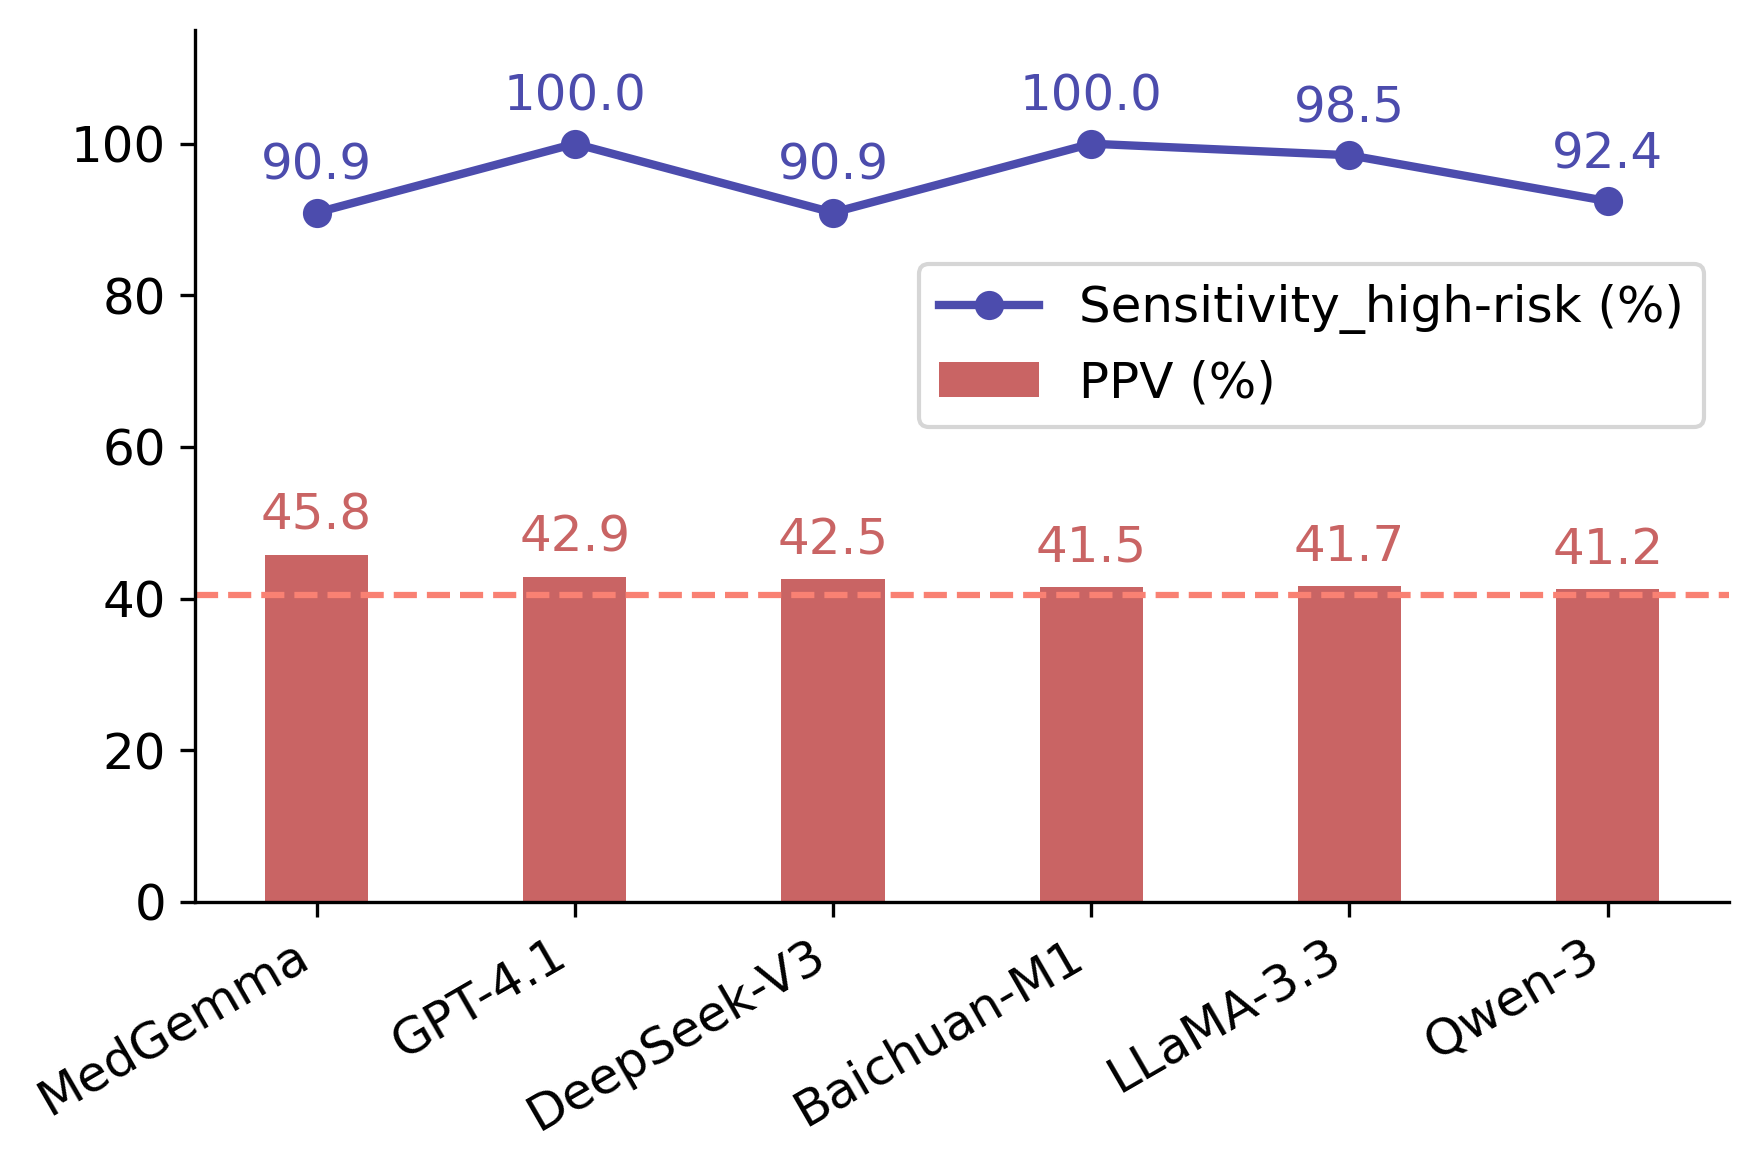

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# num = 'a2'
num = 'b1'
title = "Clinical evaluation in internal validation"

# Model labels
models = results_df['Model']
ppv_values = results_df['PPV (%)']
sensitivity_values = results_df['Sensitivity (%)']

# Create figure
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=300)
# fig, ax1 = plt.subplots(figsize=(6, 4))

# Bar positions and maximum y-axis value
bar_width = 0.4
bar_positions = np.arange(len(models))
max_y = max(max(ppv_values), max(sensitivity_values)) + 15

# Bar plot (PPV)
bars = ax1.bar(bar_positions, ppv_values, width=bar_width, color='#C96464', label='PPV (%)')

# Line plot (Sensitivity)
ax1.plot(bar_positions, sensitivity_values, color='#4C4CAD', marker='o', linewidth=2,
         label='Sensitivity_high-risk (%)')

# Axis settings
ax1.set_ylim(0, max_y)
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(models, rotation=30, ha='right', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black', labelsize=12)

# Add dashed line for high-risk PPV
ax1.axhline(y=ppv, color='#F98173', linestyle='--', linewidth=1.5)

# Hide top and right spines
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)

# Add PPV labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width()/2, height + 2),
                 ha='center', va='bottom', fontsize=12, color='#C96464')

# Add Sensitivity labels on line points
for i, val in enumerate(sensitivity_values):
    ax1.annotate(f'{val:.1f}', xy=(bar_positions[i], val + 3),
                 ha='center', va='bottom', fontsize=12, color='#4C4CAD')

# Title and legend
### Add in Visio later for sublabels ###
# plt.title(f'{num}. {title}', fontsize=16, pad=10)

ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.76), fontsize=12)

fig.tight_layout()
plt.show()


### External verification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db = 'SZBA'  # example database name
cd = './LLM_Risk_Stratification/'

llm_models = ['medgemma', 'gpt', 'deepseek', 'baichuan', 'llama', 'qwen']
labels = [
    'MedGemma',
    'GPT-4.1',
    'DeepSeek-V3',
    'Baichuan-M1',
    'LLaMA-3.3',
    'Qwen-3',
]

# Store evaluation metrics for each model
results = []

for model, label in zip(llm_models, labels):
    search_path = cd + f'llm_results_all_high_risk_Ext/{model}/{db}/'
    llm_results_df = pd.read_csv(search_path + 'llm_false_alarm_analysis.csv')  # Updated result storage path

    # Compute TP, FP, FN, TN
    tp = len(llm_results_df[(llm_results_df['y_test'] == 1) & (llm_results_df['LLM_decision'] == 'yes')])  # True Positive (correct alert)
    fp = len(llm_results_df[(llm_results_df['y_test'] == 0) & (llm_results_df['LLM_decision'] == 'yes')])  # False Positive (incorrect alert)
    fn = len(llm_results_df[(llm_results_df['y_test'] == 1) & (llm_results_df['LLM_decision'] != 'yes')])  # False Negative (missed alert)
    tn = len(llm_results_df[(llm_results_df['y_test'] == 0) & (llm_results_df['LLM_decision'].isin(['no', 'uncertain']))])  # True Negative

    # PPV (Precision)
    alert_num = tp + fp
    ppv = round(tp / alert_num * 100, 2) if alert_num > 0 else 0.0

    # Sensitivity (Recall)
    actual_positive = tp + fn
    sensitivity = round(tp / actual_positive * 100, 2) if actual_positive > 0 else 0.0

    # Specificity
    actual_negative = tn + fp
    specificity = round(tn / actual_negative * 100, 2) if actual_negative > 0 else 0.0

    # NPV
    not_alert_num = tn + fn
    npv = round(tn / not_alert_num * 100, 2) if not_alert_num > 0 else 0.0

    results.append({
        'Model': label,
        'TP': tp,
        'FP': fp,
        'TN': tn,
        'FN': fn,
        'PPV (%)': ppv,
        'NPV (%)': npv,
        'Sensitivity (%)': sensitivity,
        'Specificity (%)': specificity
    })

# Generate results DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


         Model  TP  FP  TN  FN  PPV (%)  NPV (%)  Sensitivity (%)  \
0     MedGemma  38  40  31   4    48.72    88.57            90.48   
1      GPT-4.1  41  61  10   1    40.20    90.91            97.62   
2  DeepSeek-V3  39  50  21   3    43.82    87.50            92.86   
3  Baichuan-M1  42  70   1   0    37.50   100.00           100.00   
4    LLaMA-3.3  41  63   8   1    39.42    88.89            97.62   
5       Qwen-3  41  51  20   1    44.57    95.24            97.62   

   Specificity (%)  
0            43.66  
1            14.08  
2            29.58  
3             1.41  
4            11.27  
5            28.17  


In [ ]:
############### PPV of High-Risk Group in Risk Stratification #######################
import os
import pandas as pd
import numpy as np

db = 'SZBA'  # example database name

cd = './LLM_Risk_Stratification/'
file_path = cd + 'LLM_input_data/' + db +'_Ext' + '/' + 'llm_input_data.csv'  # Prediction probability + risk level + patient top 20 features (personalized SHAP ranking) and corresponding raw values

# High-, medium-, and low-risk patients
all_patients = pd.read_csv(file_path)
# print(all_patients)

# Calculate TP and FP
tp = len(all_patients[(all_patients['y_test'] == 1) & (all_patients['risk_level'] == 'high-risk')])  # True positive (correct high-risk classification)
fp = len(all_patients[(all_patients['y_test'] == 0) & (all_patients['risk_level'] == 'high-risk')])  # False positive (incorrect high-risk classification)

# PPV (Precision) = TP / (TP + FP)
alert_num = tp + fp
ppv = round(tp / alert_num * 100, 2) if alert_num > 0 else 0.0
print(f'PPV of high-risk group: {ppv}%')


风险分层高风险PPV: 37.17%


In [ ]:
# Identify TP and FN
tp_sens = len(all_patients[
    (all_patients['risk_level'].isin(['medium-risk', 'high-risk'])) & (all_patients['y_test'] == 1)
])
fn_sens = len(all_patients[
    (all_patients['risk_level'] == 'low-risk') & (all_patients['y_test'] == 1)
])

# Calculate Sensitivity
denominator = tp_sens + fn_sens
sensitivity = round(tp_sens / denominator * 100, 2) if denominator > 0 else 0.0
print(f'Sensitivity of risk stratification (H2 external validation): {sensitivity}%')


风险分层敏感性（Sensitivity）_H2外部验证: 77.78%


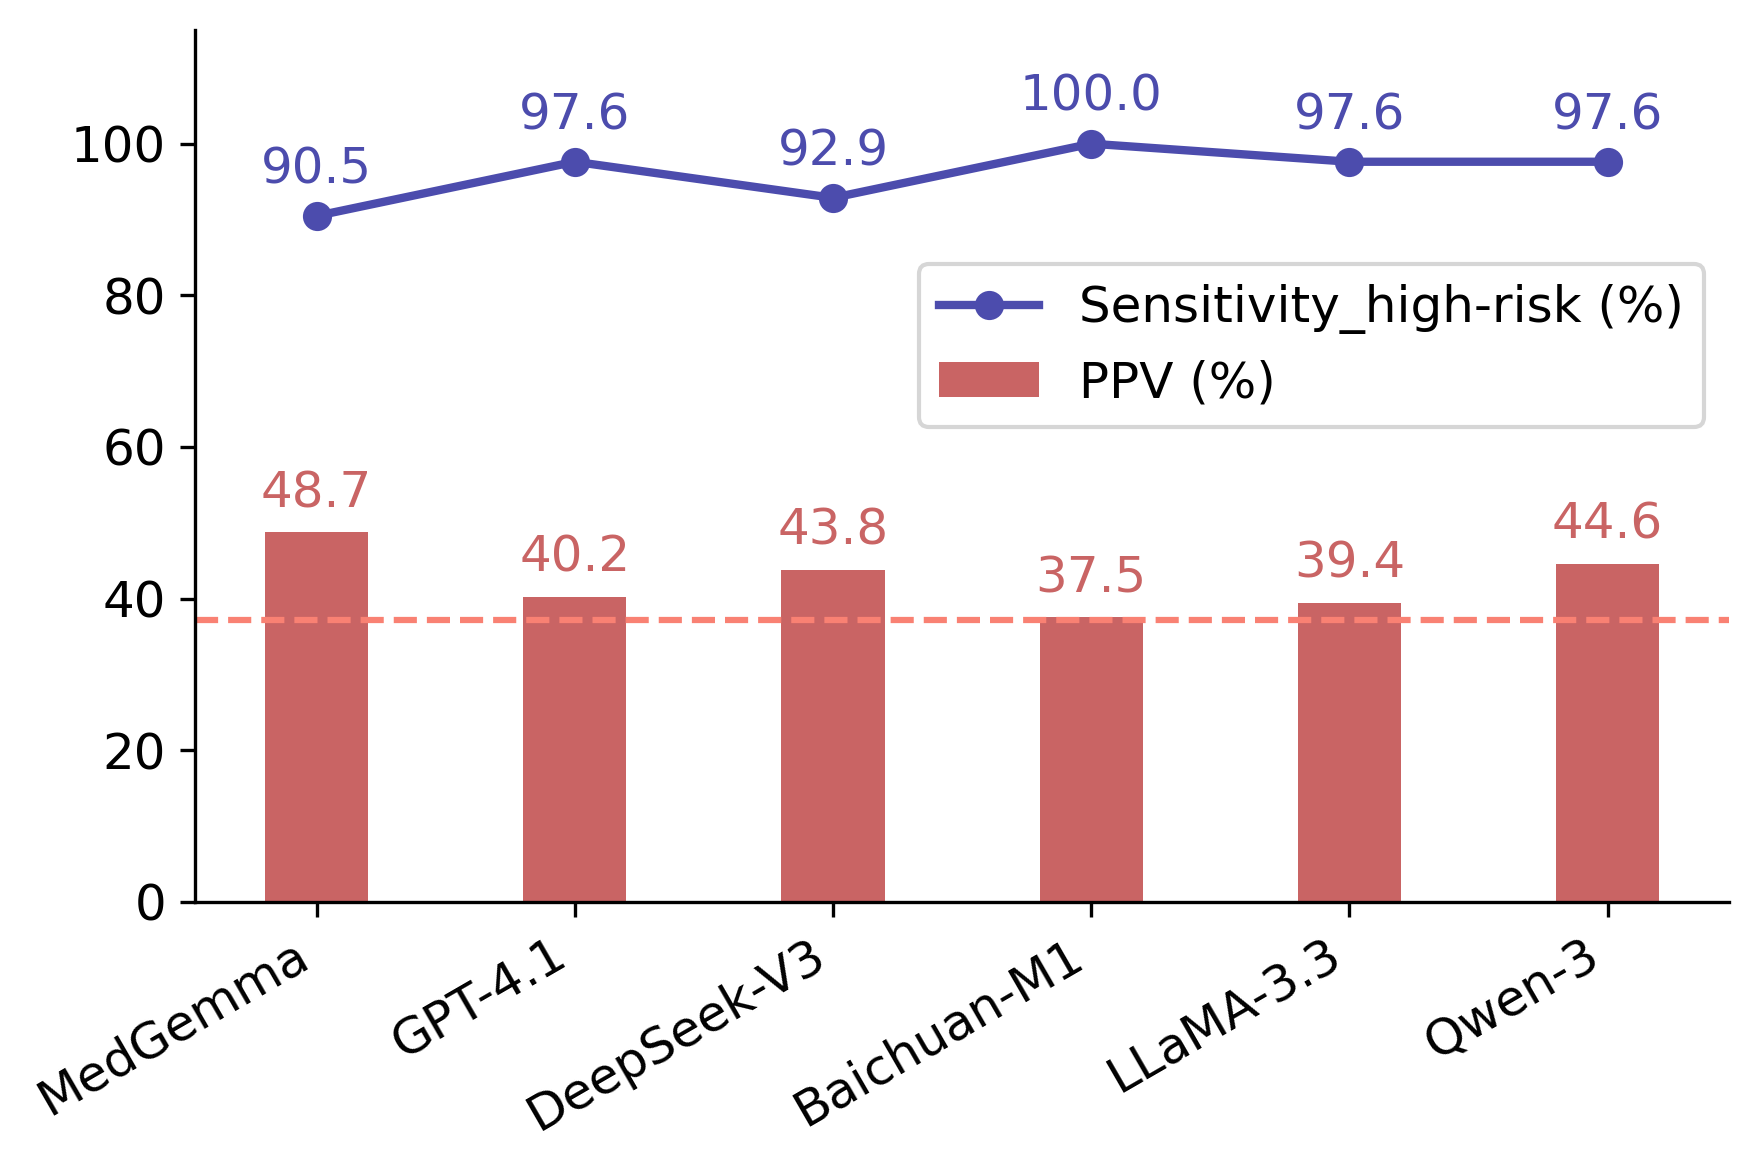

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num = 'b2'
title = "Clinical evaluation in external validation"

# Model labels
models = results_df['Model']
ppv_values = results_df['PPV (%)']
sensitivity_values = results_df['Sensitivity (%)']

# Create figure
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=300)
# fig, ax1 = plt.subplots(figsize=(6, 4))

# Bar positions and maximum y-axis value
bar_width = 0.4
bar_positions = np.arange(len(models))
max_y = max(max(ppv_values), max(sensitivity_values)) + 15

# Bar plot (PPV)
bars = ax1.bar(bar_positions, ppv_values, width=bar_width, color='#C96464', label='PPV (%)')

# Line plot (Sensitivity)
ax1.plot(bar_positions, sensitivity_values, color='#4C4CAD', marker='o', linewidth=2,
         label='Sensitivity_high-risk (%)')

# Axis settings
ax1.set_ylim(0, max_y)
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(models, rotation=30, ha='right', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black', labelsize=12)

# Add dashed line for high-risk PPV
ax1.axhline(y=ppv, color='#F98173', linestyle='--', linewidth=1.5)

# Hide top and right spines
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)

# Add PPV labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width()/2, height + 2),
                 ha='center', va='bottom', fontsize=12, color='#C96464')

# Add Sensitivity labels on line points
for i, val in enumerate(sensitivity_values):
    ax1.annotate(f'{val:.1f}', xy=(bar_positions[i], val + 3),
                 ha='center', va='bottom', fontsize=12, color='#4C4CAD')

# Title and legend
### Add in Visio later for sublabels ###
# plt.title(f'{num}. {title}', fontsize=16, pad=10)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.76), fontsize=12)

fig.tight_layout()
plt.show()
